## Cluster Analysis of Global Devlopment Measurements . 

###  Business Objective : 

In [1]:
## Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder 

###  Importing dataset 

In [2]:
data = pd.read_excel('World_development_mesurement.xlsx')
data 

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [3]:
data.head() 

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


###  Data Cleaning and Preparation 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

#### Country column is Categorical type we have to convert it into numerical type .

###  Encoding 

In [5]:
data['Country'].nunique() 

208

In [6]:
## But the Country column has 208 unique categories. 

####  Here, we use the label encoding 

In [7]:
# create the label encoder object 
le = LabelEncoder() 

# Fit and transform the 'Country' column in the DataFrame 
data['Country_encoded'] = le.fit_transform(data['Country'])

In [8]:
data['Country_encoded'] = data['Country_encoded'].astype(float) 

In [9]:
# drop the country column 
data.drop(['Country'],axis=1,inplace=True) 

In [10]:
# shape of the data 
data.shape 

(2704, 25)

In [11]:
data.head() 

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


####  Some columns has $ and % attached we will have to remove it 

In [12]:
data['GDP'] = data['GDP'].str.replace('$', '').str.replace(',', '').astype(float)

data['Health Exp/Capita'] = data['Health Exp/Capita'].str.replace('$', '').str.replace(',', '').astype(float)

data['Tourism Inbound'] = data['Tourism Inbound'].str.replace('$', '').str.replace(',', '').astype(float)

data['Tourism Outbound'] = data['Tourism Outbound'].str.replace('$', '').str.replace(',', '').astype(float)

data['Business Tax Rate'] = data['Business Tax Rate'].str.replace('%', '').str.replace(',', '').astype(float)

In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [14]:
data['Number of Records'] = data['Number of Records'].astype(float) 
data['Population Total'] = data['Population Total'].astype(float) 

In [15]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

####  All the datatypes has the same format 

In [16]:
## check the distribution for the same columns 
data.describe() 

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


In [17]:
## Drop  'Number of Records' column 
data = data.drop(columns=['Number of Records'],axis=1)

In [18]:
## Check the columns 
data.columns 

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [19]:
## Rename the columns 

data = data.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emission','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                             'Lending Interest': 'LendingInterest','Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Population 0-14':'Population0to14','Population 15-64':'Population15to64',
                              'Population 65+' : 'Populationmorethan65', 'Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound',
                              'Tourism Outbound':'TourismOutbound'})

In [20]:
## check the missing values 
data.isnull().sum().sum() 

11740

####  Total 11740 null values in whole dataset 

In [21]:
## check the null values  
data.isnull().sum() 

BirthRate                119
BusinessTaxRate         1281
CO2Emission              579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          309
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64

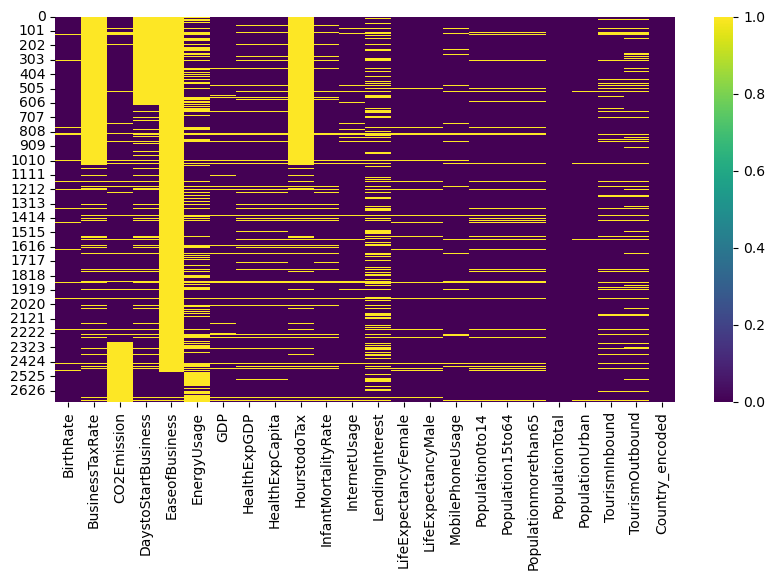

In [22]:
# Vusualizing the null values for each attribute 
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis')
plt.show() 

####  we can see that, 

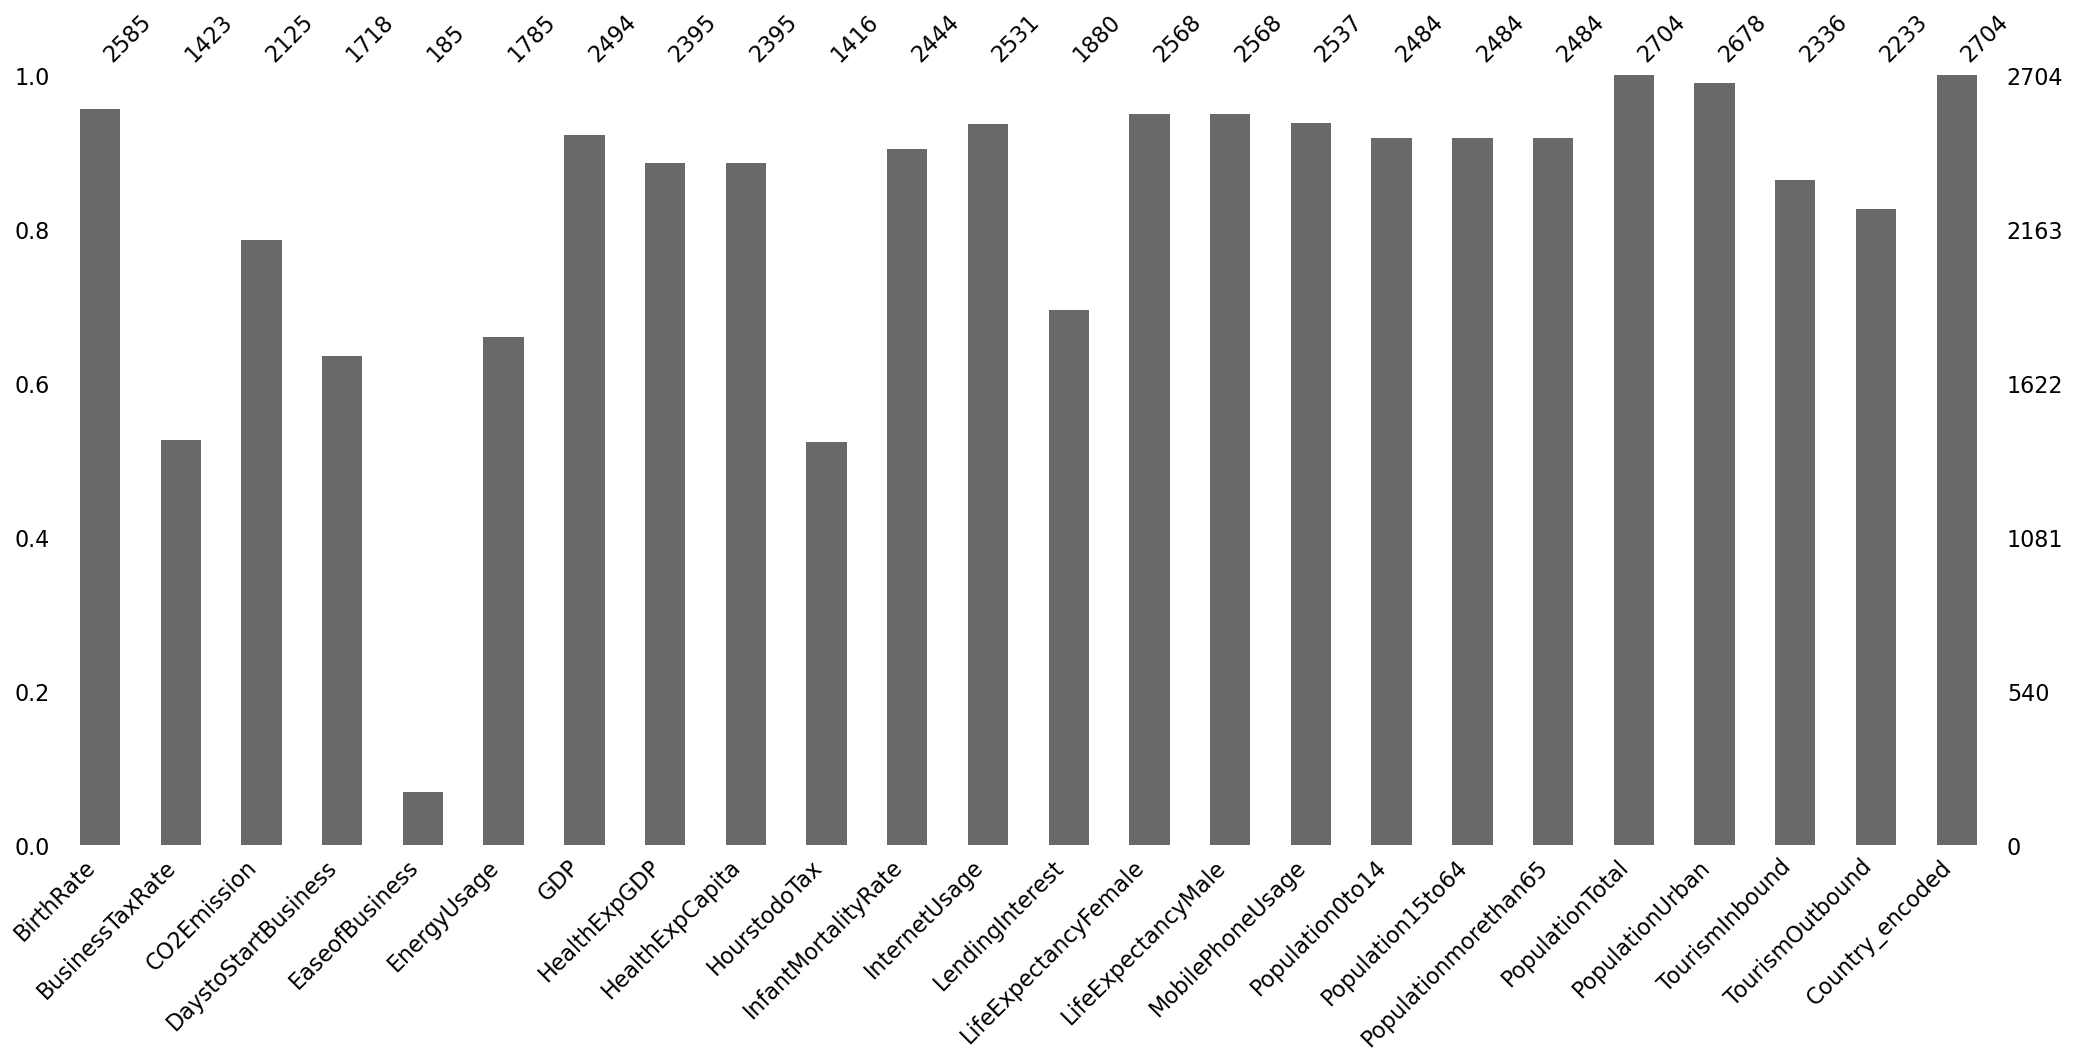

In [23]:
# Visualize the missing value for each attribute 
import missingno as msno 
msno.bar(data) 
plt.show() 

In [24]:
# % of the missing values for each attribute 
for i in data.isna().sum():
    print(i/len(data)*100) 

4.400887573964497
47.374260355029584
21.412721893491124
36.46449704142012
93.15828402366864
33.98668639053255
7.766272189349112
11.427514792899409
11.427514792899409
47.633136094674555
9.615384615384617
6.397928994082839
30.473372781065088
5.029585798816568
5.029585798816568
6.17603550295858
8.136094674556213
8.136094674556213
8.136094674556213
0.0
0.9615384615384616
13.609467455621301
17.418639053254438
0.0


####  There are 26 null values in population urban column which is less than 1% values so dropping those rows 

In [25]:
## Removing the rows having the null values 
data.dropna(subset=['PopulationUrban'],inplace=True)

# check the null values 
data.isna().sum() 

BirthRate                119
BusinessTaxRate         1259
CO2Emission              553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          283
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound           342
TourismOutbound          445
Country_encoded            0
dtype: int64

####  There is no null values in Population Urban 

<Axes: xlabel='TourismOutbound', ylabel='Density'>

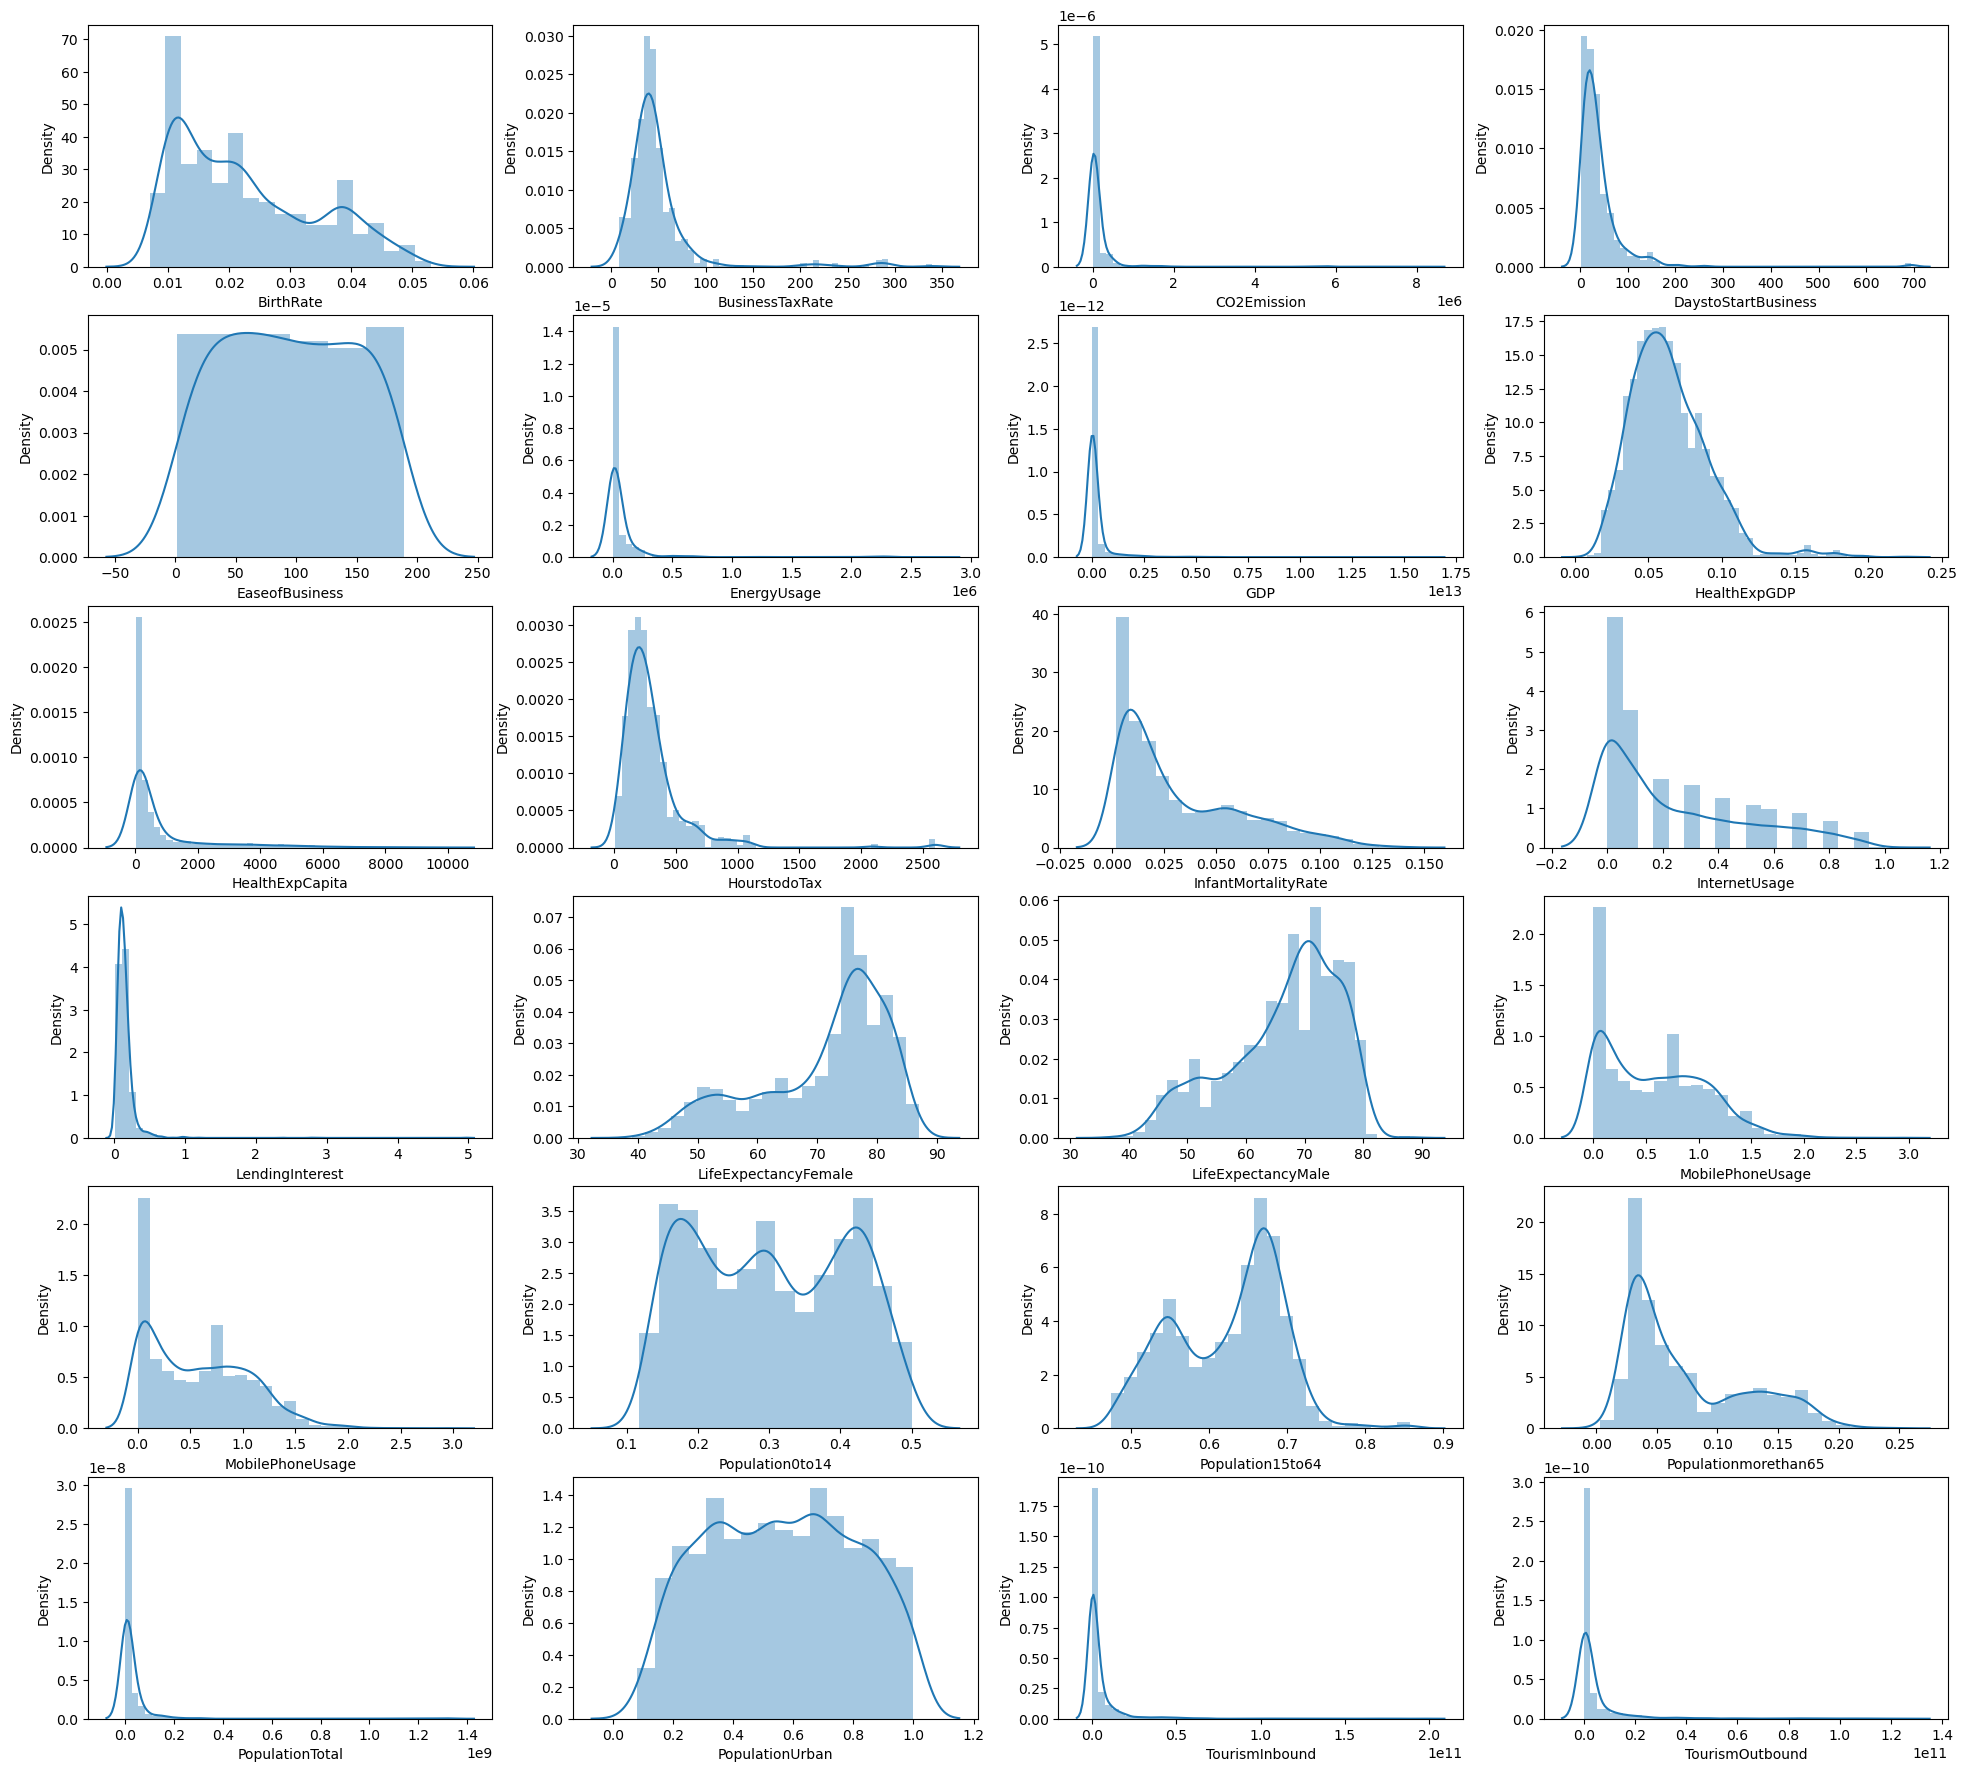

In [26]:
# Distribution plots for all the columns 
fig, axes= plt.subplots(6,4,figsize=(24,22))
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emission,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])

sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])

sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])

sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])

sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14 ,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])


sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban ,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])


In [27]:
## Replace the missing values by the mean 

data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness'] = data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean()) 
data['HealthExpGDP'] = data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean()) 
data['HourstodoTax'] = data['HourstodoTax'].fillna(data['HourstodoTax'].mean()) 
data['Population0to14'] = data['Population0to14'].fillna(data['Population0to14'].mean()) 

## Replace the missing values by median 

data['BirthRate'] = data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emission'] = data['CO2Emission'].fillna(data['CO2Emission'].median()) 
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median()) 
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median()) 
data['HealthExpCapita'] = data['HealthExpCapita'].fillna(data['HealthExpCapita'].median()) 
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate'] = data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median()) 
data['InternetUsage'] = data['InternetUsage'].fillna(data['InternetUsage'].median()) 
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median()) 
data['LifeExpectancyFemale'] = data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median()) 
data['LifeExpectancyMale'] = data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage'] = data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median()) 
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median()) 
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median()) 
data['Population15to64'] = data['Population15to64'].fillna(data['Population15to64'].median()) 
data['Populationmorethan65'] = data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())

In [28]:
data.isna().sum() 

BirthRate               0
BusinessTaxRate         0
CO2Emission             0
DaystoStartBusiness     0
EaseofBusiness          0
EnergyUsage             0
GDP                     0
HealthExpGDP            0
HealthExpCapita         0
HourstodoTax            0
InfantMortalityRate     0
InternetUsage           0
LendingInterest         0
LifeExpectancyFemale    0
LifeExpectancyMale      0
MobilePhoneUsage        0
Population0to14         0
Population15to64        0
Populationmorethan65    0
PopulationTotal         0
PopulationUrban         0
TourismInbound          0
TourismOutbound         0
Country_encoded         0
dtype: int64

In [29]:
## Check the missing values in the dataset 

print('{} missing values present in the whole data.'.format(data.isnull().sum().sum()))

0 missing values present in the whole data.


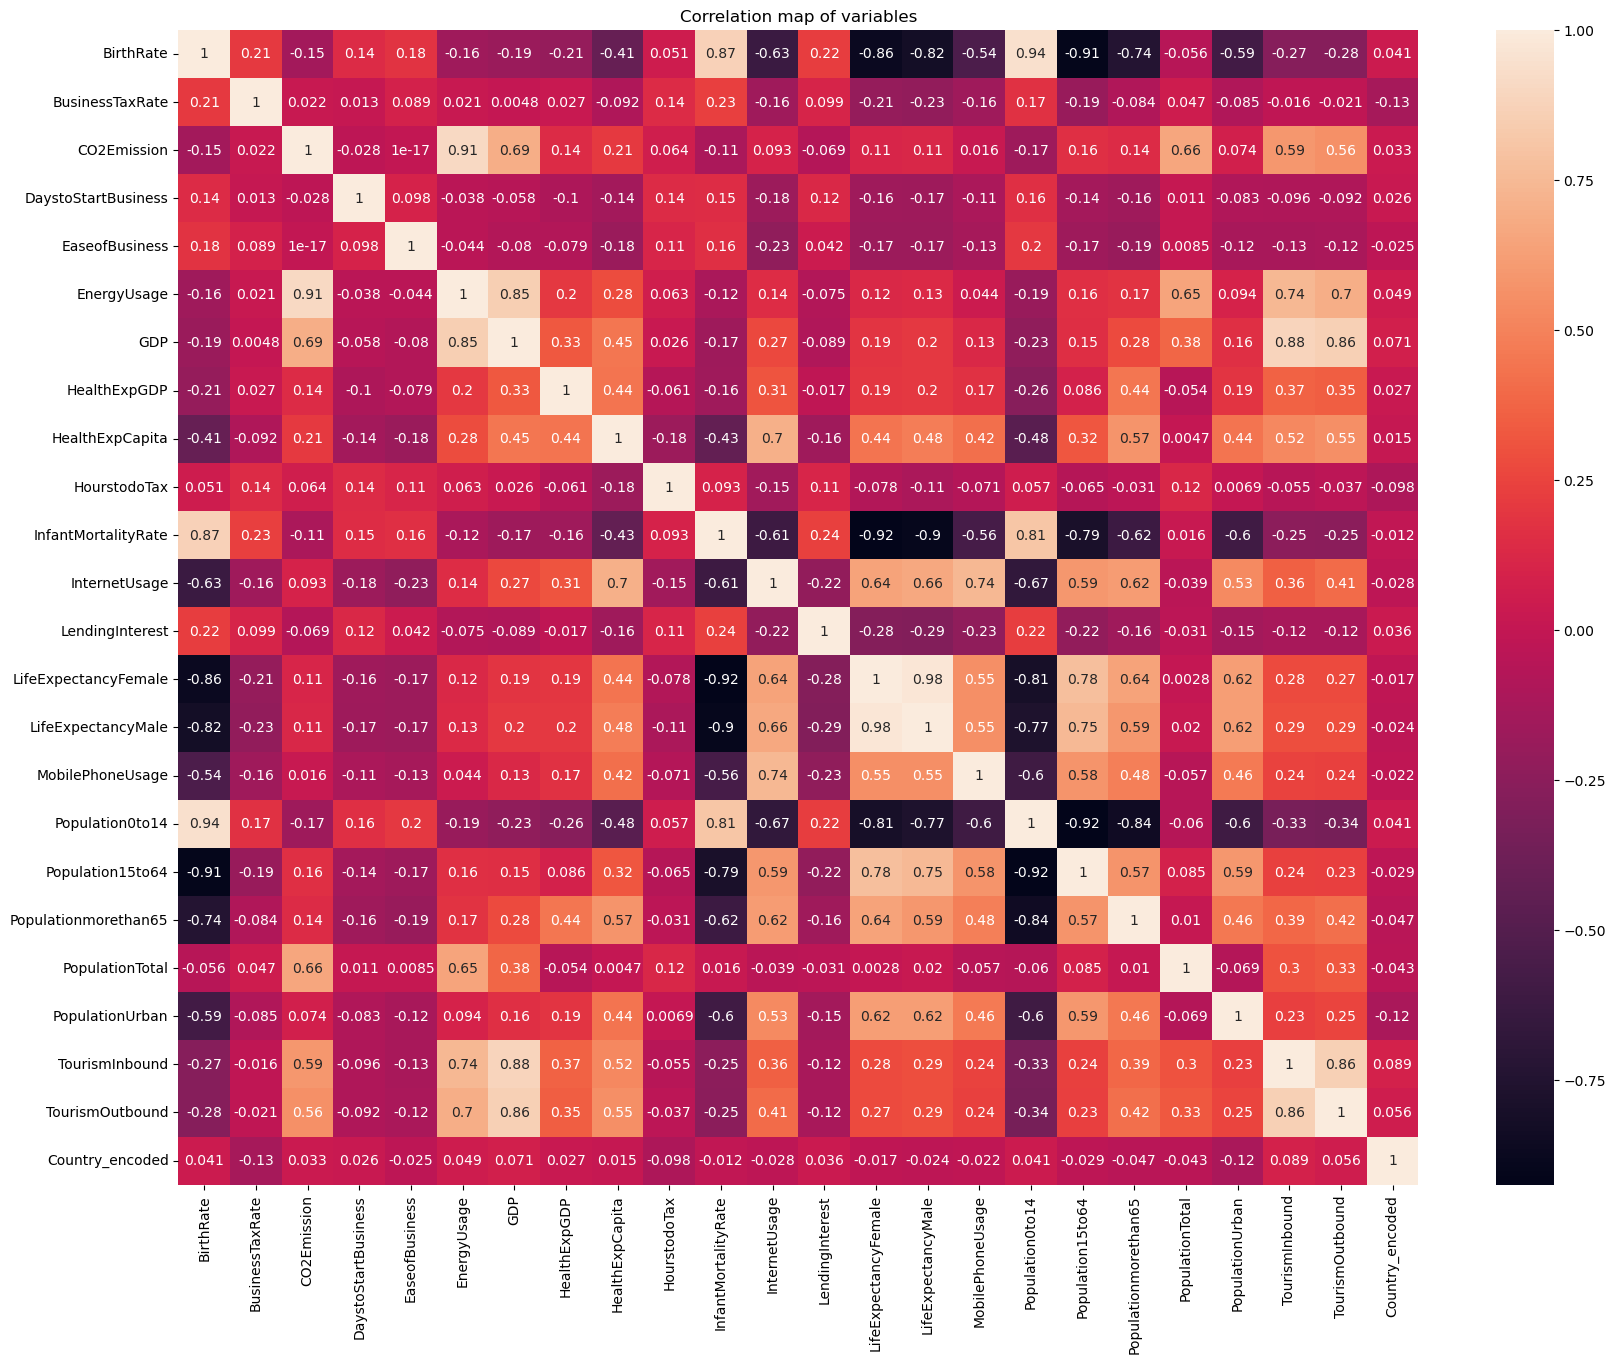

In [30]:
# Visualize the relation between variables 

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation map of variables')
plt.show() 

####  Conclusion 

In [31]:
# making the copy of the data :- 
data1 = data.copy()  # for method 1
data2 = data.copy()  # for method 2
data3 = data.copy()  # for method 3 

###  Outlier Detection 

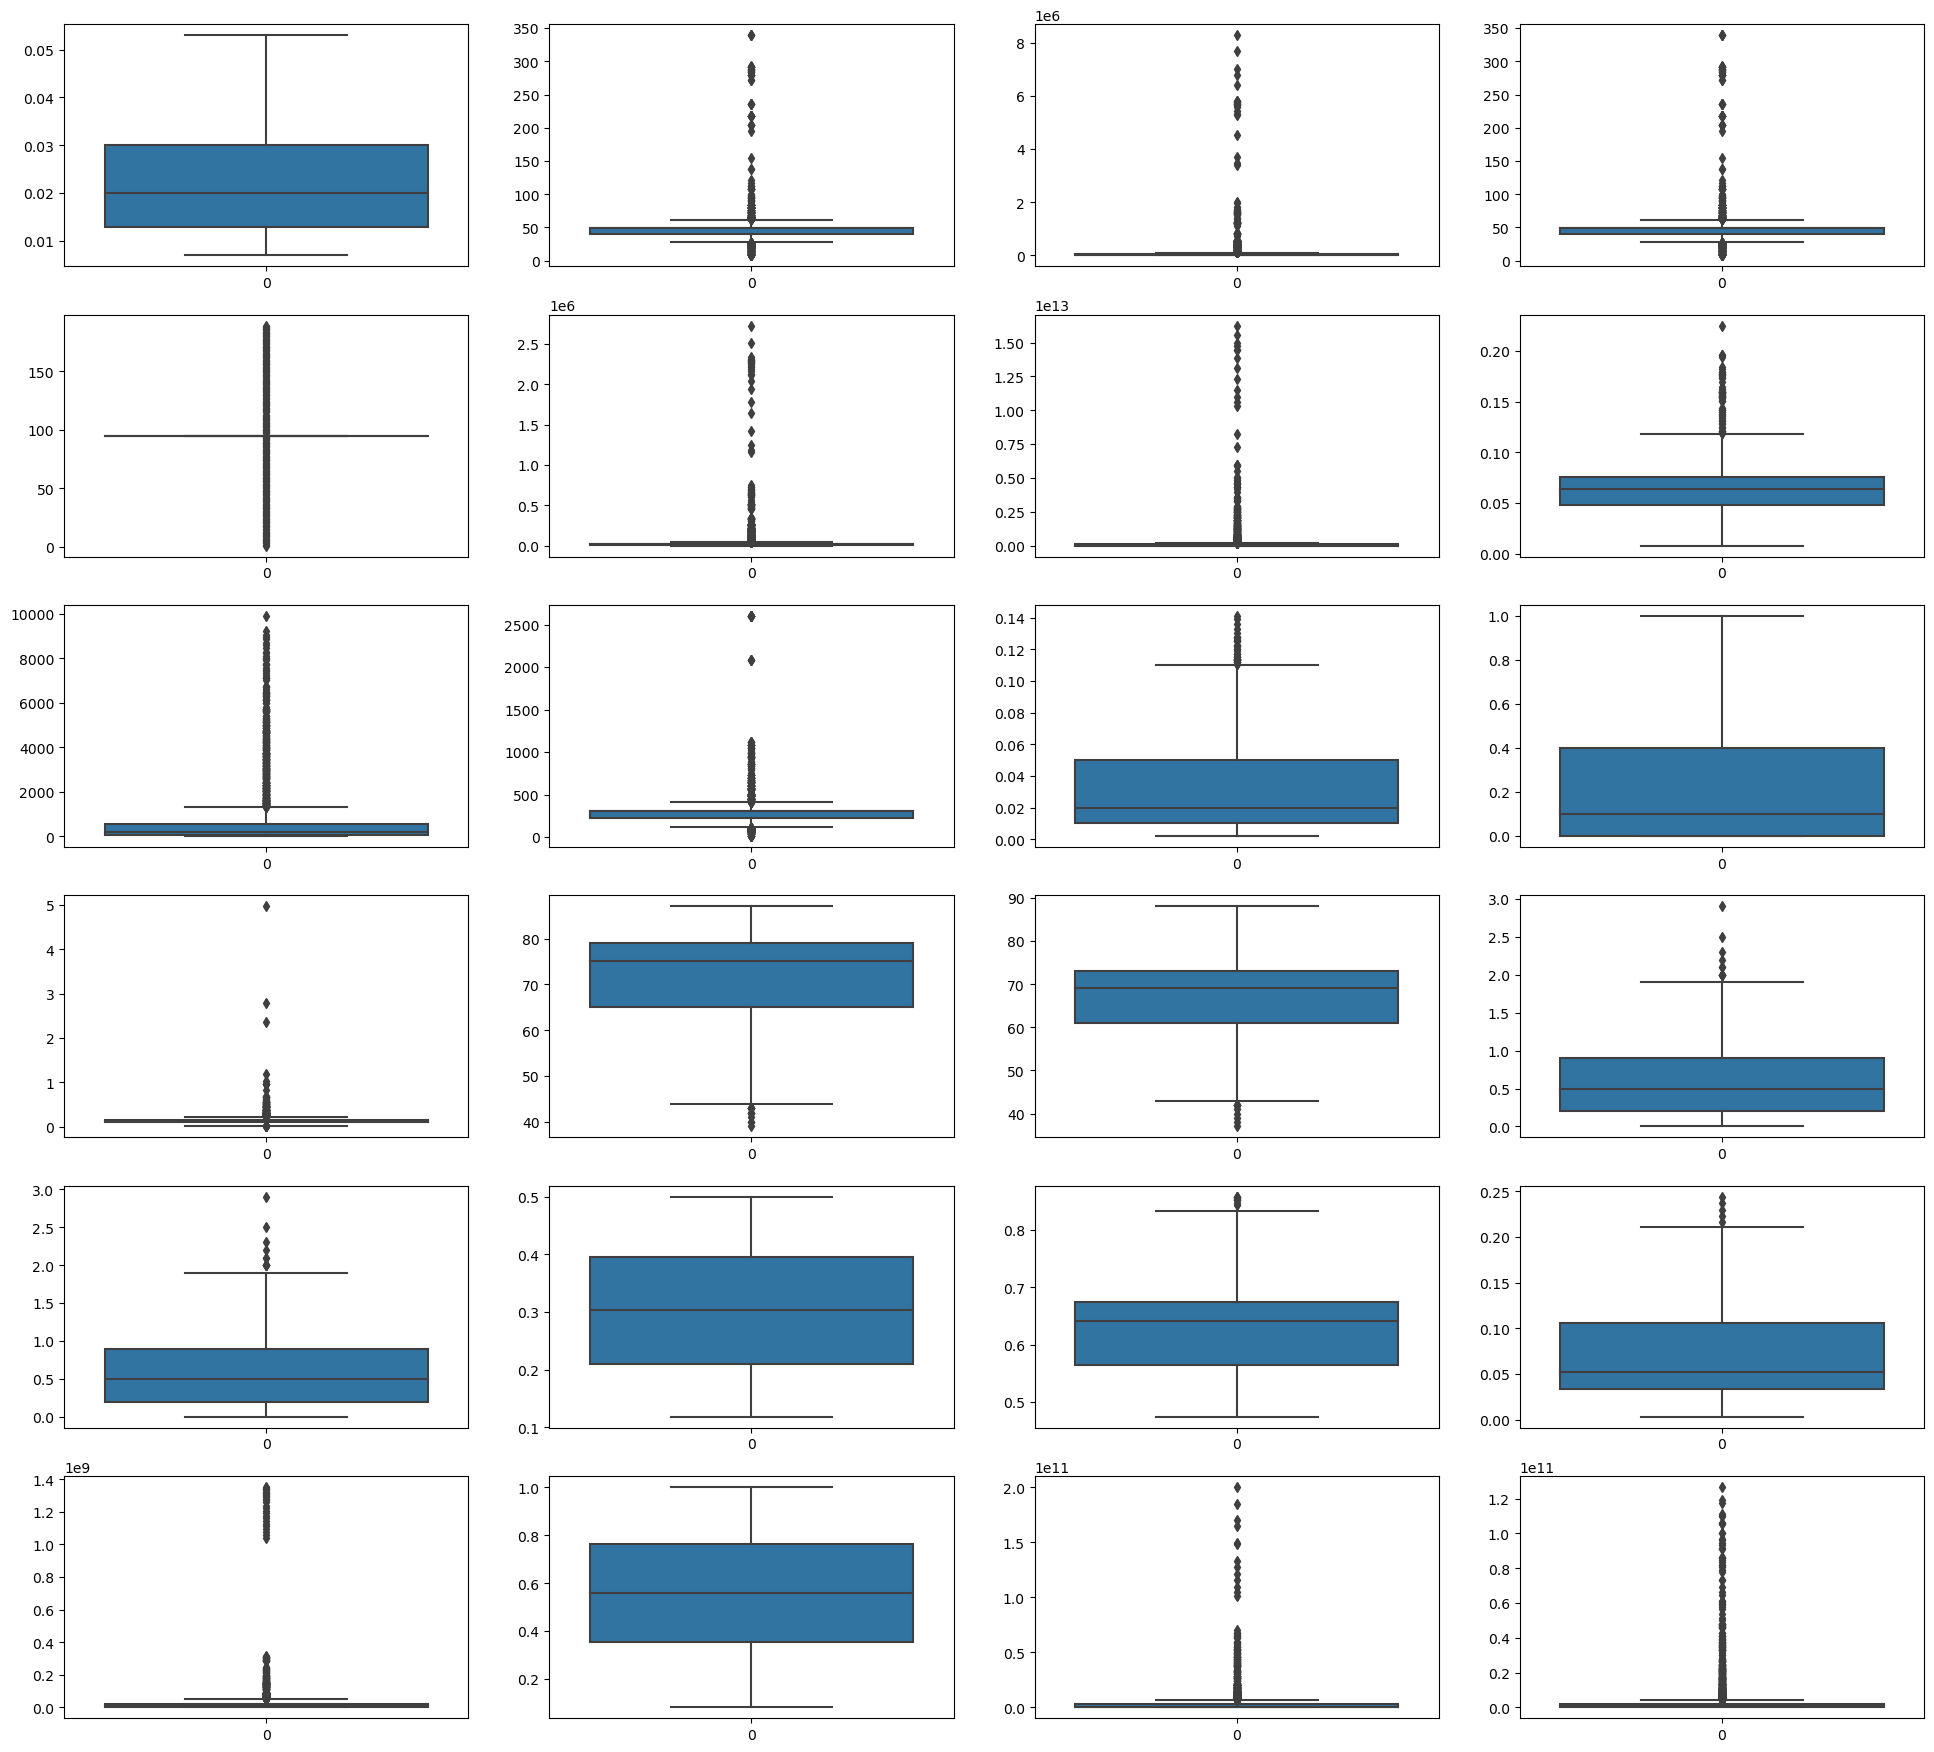

In [32]:
## check the outliers present in the data 
fig,axes=plt.subplots(6,4,figsize=(24,22))

sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emission,ax=axes[0,2])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,3])

sns.boxplot(data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])

sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3])

sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])

sns.boxplot(data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(data1.Population0to14 ,ax=axes[4,1])
sns.boxplot(data1.Population15to64,ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,3])


sns.boxplot(data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(data1.PopulationUrban ,ax=axes[5,1])
sns.boxplot(data1.TourismInbound,ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,ax=axes[5,3])

plt.show() 


###  Conclusion 

##  Method 1 

### Remove Outliers 

In [33]:
# Outlier Removal 
Q1 = data1.quantile(0.25) 
Q3 = data1.quantile(0.75) 
IQR = Q3-Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 +1.5 * IQR))).any(axis=1)]

In [34]:
data1.shape 

(1040, 24)

###  Scaling 

In [35]:
# Standardisation of the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scale_data = scaler.fit_transform(data1) 

### Apply PCA 

In [36]:
from sklearn.decomposition import PCA 
pc = PCA() 
pc_components = pc.fit_transform(scale_data) 

In [37]:
# The amout of variance that each PCA explains is 
pc.explained_variance_ 

array([8.20252203e+00, 2.91704760e+00, 1.80473056e+00, 1.34964450e+00,
       1.11703390e+00, 1.00183257e+00, 9.63895625e-01, 8.38596395e-01,
       7.55014092e-01, 6.99038526e-01, 6.31273821e-01, 5.27557250e-01,
       4.50039509e-01, 3.94579527e-01, 3.10077981e-01, 2.92685377e-01,
       2.51275739e-01, 2.08516573e-01, 1.75068390e-01, 7.17426419e-02,
       4.47132826e-02, 1.51994287e-02, 5.13568867e-05, 0.00000000e+00])

In [38]:
# In percentage - The amount of variance thst each PCA explains is 
var = pc.explained_variance_ratio_ 
var 

array([3.56288478e-01, 1.26706206e-01, 7.83910974e-02, 5.86237722e-02,
       4.85199925e-02, 4.35160553e-02, 4.18682088e-02, 3.64256544e-02,
       3.27951355e-02, 3.03637554e-02, 2.74202968e-02, 2.29152167e-02,
       1.95481208e-02, 1.71391358e-02, 1.34686882e-02, 1.27132151e-02,
       1.09145273e-02, 9.05722070e-03, 7.60435024e-03, 3.11624603e-03,
       1.94218648e-03, 6.60209298e-04, 2.23076109e-06, 0.00000000e+00])

In [39]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1 

array([35.63, 48.3 , 56.14, 62.  , 66.85, 71.2 , 75.39, 79.03, 82.31,
       85.35, 88.09, 90.38, 92.33, 94.04, 95.39, 96.66, 97.75, 98.66,
       99.42, 99.73, 99.92, 99.99, 99.99, 99.99])

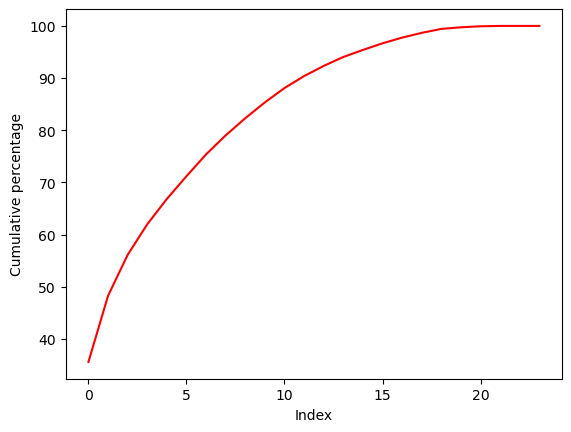

In [40]:
# variance plot for PCA components obtained 
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative percentage')
plt.show() 

In [41]:
data_pca = pc_components[:,:15]

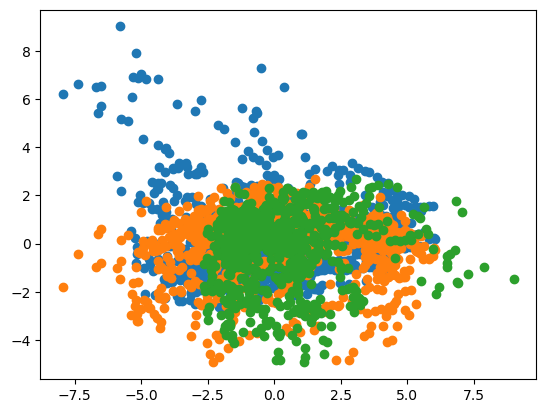

In [42]:
# Plot between PCA's
x = pc_components[:,0]
y = pc_components[:,1]
z = pc_components[:,2]
plt.scatter(x,y) 
plt.scatter(x,z) 
plt.scatter(y,z) 
plt.show() 

###  Model Building 

###  K-Means Clustering 

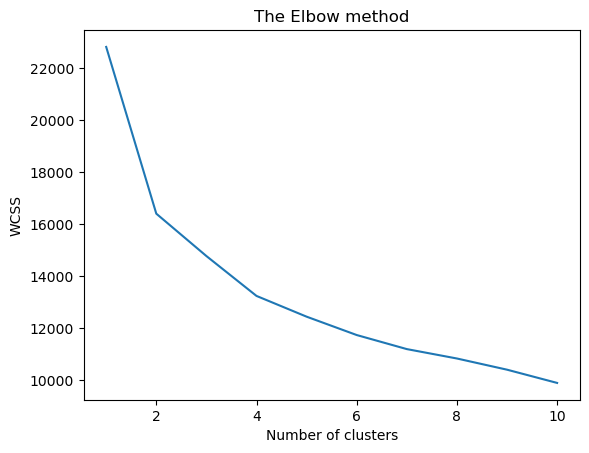

In [43]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [44]:
## creating the clusters 
kmean = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca) 

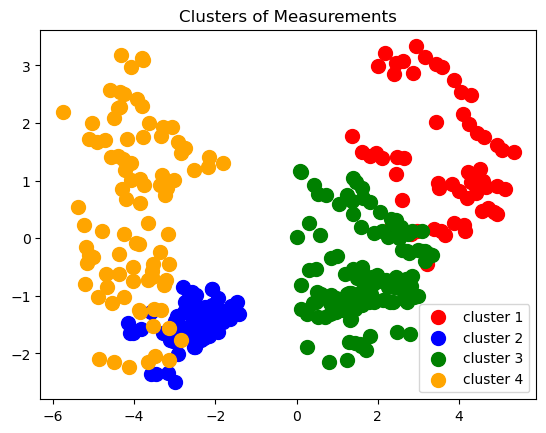

In [45]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100 , c = 'red', label = 'cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100 , c = 'blue', label = 'cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100 , c = 'green', label = 'cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100 , c = 'orange', label = 'cluster 4')
plt.title('Clusters of Measurements')
plt.legend()
plt.show() 

In [48]:
## Accuracy check 
from sklearn.metrics import silhouette_score 
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('silhouette score for k-means clustering :', s1_kmeans)

silhouette score for k-means clustering : 0.14676745845970016


###  Hierarchy Clustering 

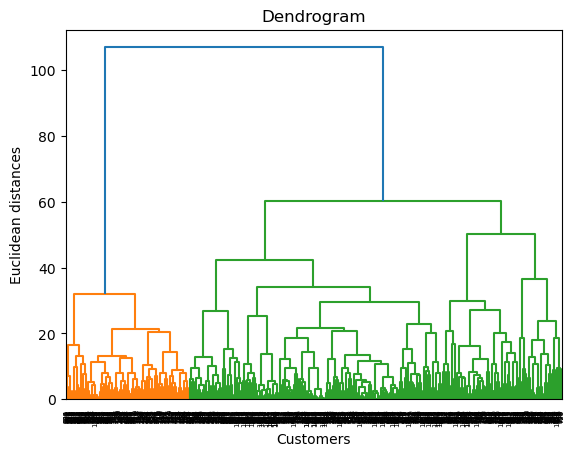

In [47]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(data_pca , method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() 


In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca) 

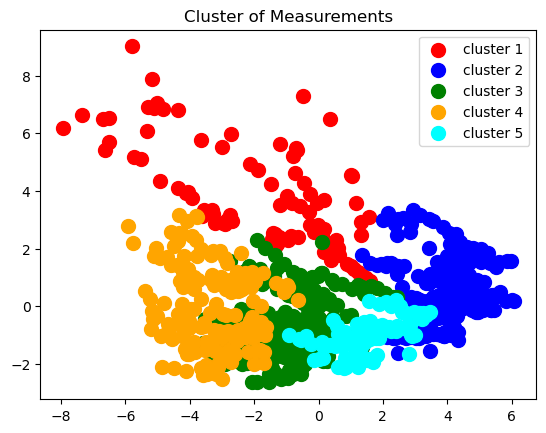

In [52]:
plt.scatter(data_pca[y_hc == 0,0], data_pca[y_hc == 0,1], s = 100, c= 'red', label = 'cluster 1')
plt.scatter(data_pca[y_hc == 1,0], data_pca[y_hc == 1,1], s = 100, c= 'blue', label = 'cluster 2')
plt.scatter(data_pca[y_hc == 2,0], data_pca[y_hc == 2,1], s = 100, c= 'green', label = 'cluster 3')
plt.scatter(data_pca[y_hc == 3,0], data_pca[y_hc == 3,1], s = 100, c= 'orange', label = 'cluster 4')
plt.scatter(data_pca[y_hc == 4,0], data_pca[y_hc == 4,1], s = 100, c= 'cyan', label = 'cluster 5')
plt.title('Cluster of Measurements')
plt.legend() 
plt.show() 

In [53]:
# Accuracy check 
s1_hierarchy = silhouette_score(data_pca, y_hc) 
print('Silhouette Score for Hierarchy Clustering :', s1_hierarchy)

Silhouette Score for Hierarchy Clustering : 0.13971875735955505


###  DBSCAN 

In [54]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples = min_samples) 

# Fit the data to obtain clustering labels 
dbscan_labels = dbscan.fit_predict(data_pca)

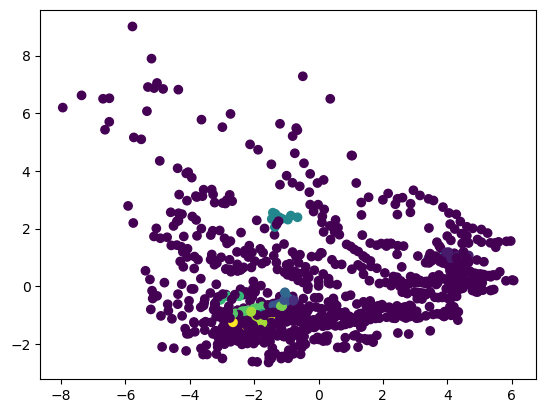

In [55]:
plt.scatter(data_pca[:,0],data_pca[:,1], c=dbscan_labels) 
plt.show() 

In [56]:
data1['cluster'] = dbscan.labels_ 
data1.head() 

,BirthRate,BusinessTaxRate,CO2Emission,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.063,7.0,302.461048,...,0.0,0.490,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,30.0,-1


In [57]:
# Use the pandas filtering and get the noisy datapoints :- 
data1[data1['cluster']== -1]

,BirthRate,BusinessTaxRate,CO2Emission,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.0,302.461048,...,0.0,0.342000,0.619,0.039,31719449.0,0.599,1.020000e+08,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.0,302.461048,...,0.0,0.454000,0.517,0.029,6949366.0,0.383,7.700000e+07,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.0,302.461048,...,0.1,0.383000,0.587,0.029,1755375.0,0.532,2.270000e+08,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.0,302.461048,...,0.0,0.468000,0.505,0.028,11607944.0,0.178,2.300000e+07,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.0,302.461048,...,0.0,0.490000,0.481,0.029,6674286.0,0.082,1.400000e+06,14000000.0,30.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0.012,49.051656,8529.0,26.0,94.869565,14673.0,5.473536e+09,0.06417,193.0,302.461048,...,1.4,0.303062,0.642,0.052,64798.0,1.000,4.610000e+08,411000000.0,21.0,-1
2669,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,193.0,302.461048,...,1.7,0.303062,0.642,0.052,57570.0,1.000,6.885000e+08,456000000.0,34.0,-1
2673,0.010,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.08600,558.0,302.461048,...,0.1,0.166000,0.704,0.130,11270957.0,0.768,2.614000e+09,456000000.0,46.0,-1
2674,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,193.0,302.461048,...,1.3,0.195000,0.668,0.137,152056.0,0.897,6.760000e+08,357000000.0,47.0,-1


In [59]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels) 
print('silhouette Score for DBSCAN is :', s1_dbscan)

silhouette Score for DBSCAN is : -0.2743142132472297


####  DBSCAN is not most effictive on this datatset 

## Method 2 

#### with outliers 

In [60]:
# Standardisation of the data 
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2) 

###  Apply PCA 

In [61]:
pc = PCA() 
pc_components = pc.fit_transform(scale_data) 

In [63]:
# In percentage - The amount of the variance that each PCA explains is 
var = pc.explained_variance_ratio_ 
var 

array([3.59368553e-01, 1.64605500e-01, 6.83068745e-02, 5.37831983e-02,
       4.53839526e-02, 3.99890805e-02, 3.76385882e-02, 3.32151143e-02,
       3.23870761e-02, 3.09036643e-02, 2.79867308e-02, 2.22754527e-02,
       1.90684648e-02, 1.81563169e-02, 1.24122046e-02, 1.00038824e-02,
       6.89543885e-03, 5.32660783e-03, 4.46052763e-03, 3.46901147e-03,
       2.12032259e-03, 1.59898498e-03, 6.42918437e-04, 1.53372943e-06])

In [64]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1 

array([ 35.94,  52.4 ,  59.23,  64.61,  69.15,  73.15,  76.91,  80.23,
        83.47,  86.56,  89.36,  91.59,  93.5 ,  95.32,  96.56,  97.56,
        98.25,  98.78,  99.23,  99.58,  99.79,  99.95, 100.01, 100.01])

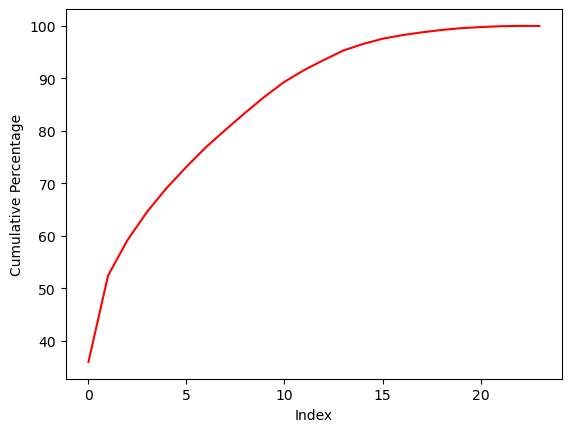

In [65]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show() 

In [68]:
data_pca2 = pc_components[:,:15]

###  k-means Clustering 

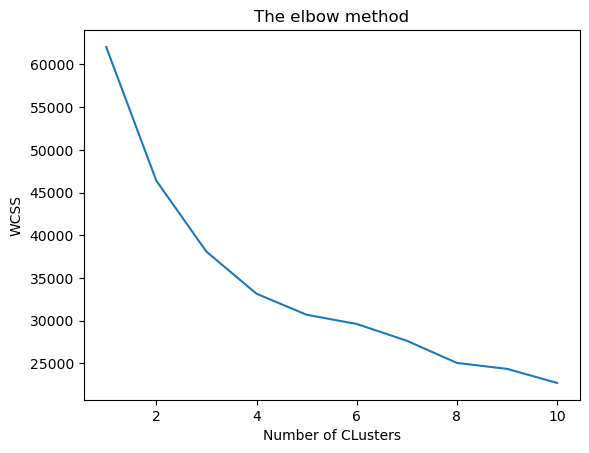

In [69]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42) 
    kmeans.fit(data_pca2) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title('The elbow method')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show() 

In [74]:
# crearing the clusters 
kmeans = KMeans(n_clusters = 3, init= 'k-means++', random_state=42) 
y_kmeans = kmeans.fit_predict(data_pca2) 

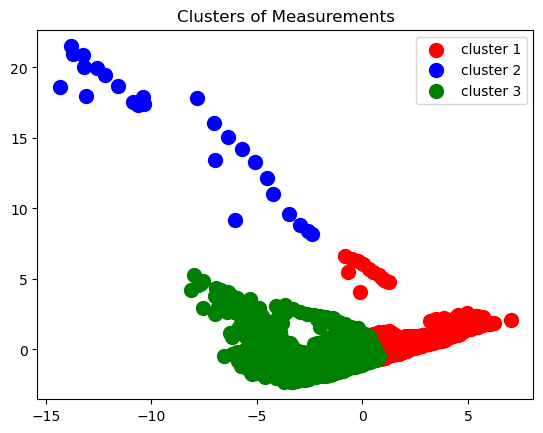

In [76]:
plt.scatter(data_pca2[y_kmeans == 0,0], data_pca2[y_means == 0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(data_pca2[y_kmeans == 1,0], data_pca2[y_means == 1,1], s=100, c ='blue', label = 'cluster 2')
plt.scatter(data_pca2[y_kmeans == 2,0], data_pca2[y_means == 2,1], s=100, c = 'green', label = 'cluster 3')
plt.title('Clusters of Measurements')
plt.legend() 
plt.show()  



In [77]:
# Accuracy check 
s2_kmeans = silhouette_score(data_pca2, y_kmeans) 
print('Silhouette score for k-means vclustering :',s2_kmeans) 

Silhouette score for k-means vclustering : 0.2993992415517183


###  Hierarchy Clustering 

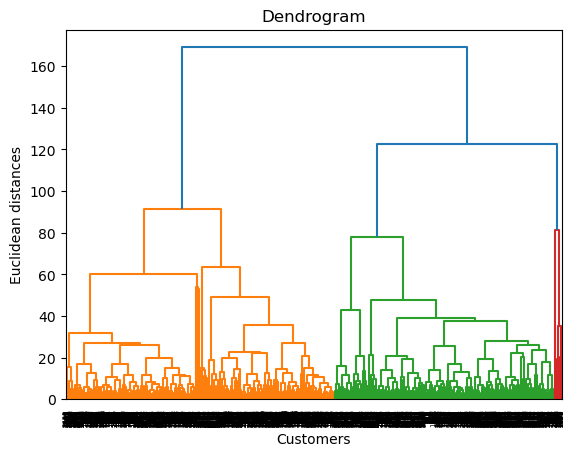

In [78]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() 

In [79]:
hc = AgglomerativeClustering(n_clusters=4 , metric='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2) 

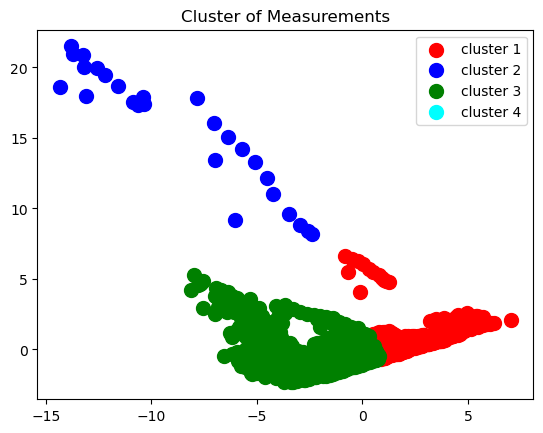

In [80]:
plt.scatter(data_pca2[y_kmeans == 0,0], data_pca2[y_means == 0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(data_pca2[y_kmeans == 1,0], data_pca2[y_means == 1,1], s=100, c ='blue', label = 'cluster 2')
plt.scatter(data_pca2[y_kmeans == 2,0], data_pca2[y_means == 2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(data_pca2[y_kmeans == 3,0], data_pca2[y_means == 3,1], s=100, c ='cyan', label = 'cluster 4')
plt.title('Cluster of Measurements')
plt.legend()
plt.show() 


In [81]:
# Accuracy scheck 
s2_hierarchy = silhouette_score(data_pca2,y_hc) 
print('Silhouette score for the hierarchy clustering :',s2_hierarchy)

Silhouette score for the hierarchy clustering : 0.16367350011853427


###   DBSCAN 

In [82]:
dbscan = DBSCAN(eps=0.2,min_samples=5) 
dbscan_labels = dbscan.fit_predict(data_pca2) 

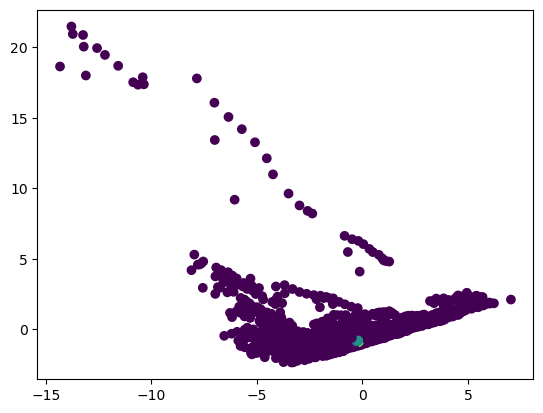

In [83]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show() 

In [84]:
data2['cluster']= dbscan.labels_ 

In [85]:
data2[data2['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emission,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.0,302.461048,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14673.0,2.343634e+10,0.05400,972.0,210.000000,...,1.4,0.207,0.705,0.088,1337439.0,0.088,6.885000e+08,4.560000e+08,189.0,-1
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,8895.0,175.000000,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,198.0,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,1308.0,310.000000,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.0,792.000000,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [88]:
s2_dbscan = silhouette_score(data_pca2,dbscan_labels)
print('Silhouette Score for DBSCAN is :', s2_dbscan) 

Silhouette Score for DBSCAN is : -0.41898995146823875


##   Method 3 

###  T-SNE 

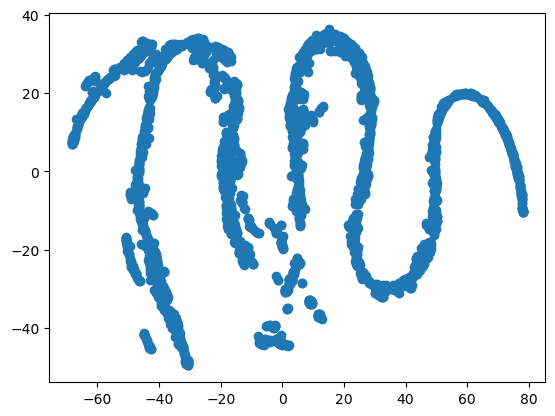

In [90]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters 
tsne = TSNE() 

# Fit and transform the data to 2 dimensions 
data_tsne = tsne.fit_transform(data3) 

# Plot the results 
plt.scatter(data_tsne[:,0], data_tsne[:,1])
plt.show() 

###  k-means clustering 

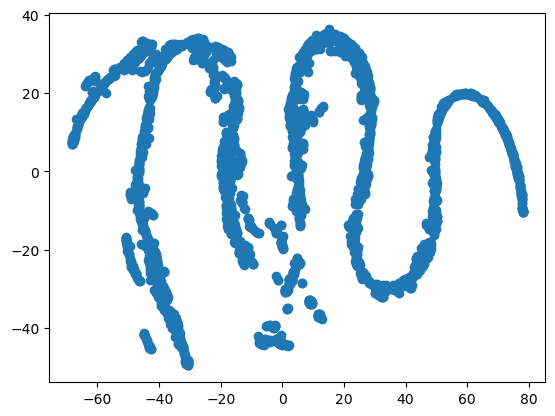

In [96]:
# perform clustering with the KMeans 
kmeans = KMeans(n_clusters = 3, init= 'k-means++', random_state=42) 
y_kmeans = kmeans.fit_predict(data_tsne) 


# Plot the clusters :- 
plt.scatter(data_tsne[:,0], data_tsne[:,1])
plt.show() 

In [97]:
# Accuracy check :- 
s3_kmeans = silhouette_score(data_tsne,y_kmeans) 
print('Silhouette score for k-means clustering :', s3_kmeans) 

Silhouette score for k-means clustering : 0.35008785


###  Hierarchy Clustering 

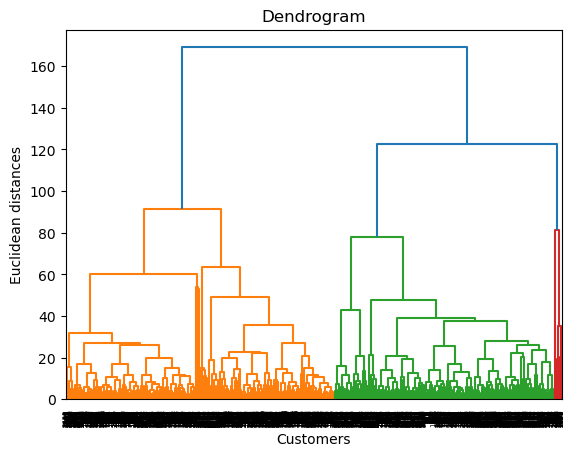

In [98]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() 

In [99]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_tsne) 

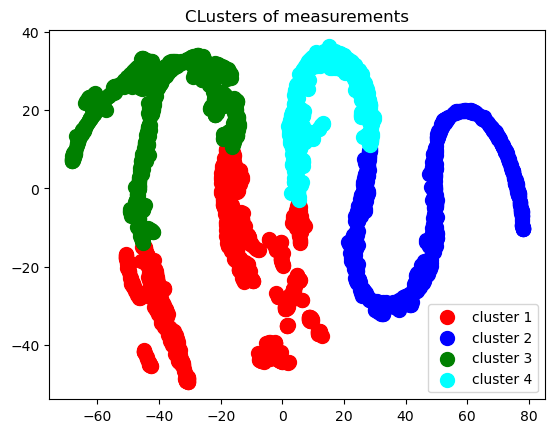

In [101]:
plt.scatter(data_tsne[y_hc == 0,0], data_tsne[y_hc == 0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(data_tsne[y_hc == 1,0], data_tsne[y_hc == 1,1], s=100, c ='blue', label = 'cluster 2')
plt.scatter(data_tsne[y_hc == 2,0], data_tsne[y_hc == 2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(data_tsne[y_hc == 3,0], data_tsne[y_hc == 3,1], s=100, c ='cyan', label = 'cluster 4')
plt.title('CLusters of measurements')
plt.legend() 
plt.show() 

In [102]:
# Accuracy check 
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette score for Hierarchy Clustering :', s3_hierarchy)

Silhouette score for Hierarchy Clustering : 0.40152892


In [103]:
df = pd.DataFrame({'Method':['M1 kmeans', 'M1 hierarchy', 'M1 DBSCAN', 'M2 kmeans', 'M2 hirarchy', 'M2 DBSCAN', 'M3 kmeans', 'M3 hierarchy'],
                   'Silhouette Score' : [s1_kmeans, s1_hierarchy, s1_dbscan, s2_kmeans, s2_hierarchy, s2_dbscan , s3_kmeans , s3_hierarchy]})

In [104]:
df

,Method,Silhouette Score
0,M1 kmeans,0.146767
1,M1 hierarchy,0.139719
2,M1 DBSCAN,-0.274314
3,M2 kmeans,0.299399
4,M2 hirarchy,0.163674
5,M2 DBSCAN,-0.418990
6,M3 kmeans,0.350088
7,M3 hierarchy,0.401529


###  Conclusion :- 